In [1]:
import pandas as pd

In [7]:
df=pd.read_csv('Churn_Modelling.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.shape

(10000, 14)

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
#input data
x=df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
'IsActiveMember', 'EstimatedSalary']]
#output data
y=df['Exited']

In [17]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [23]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

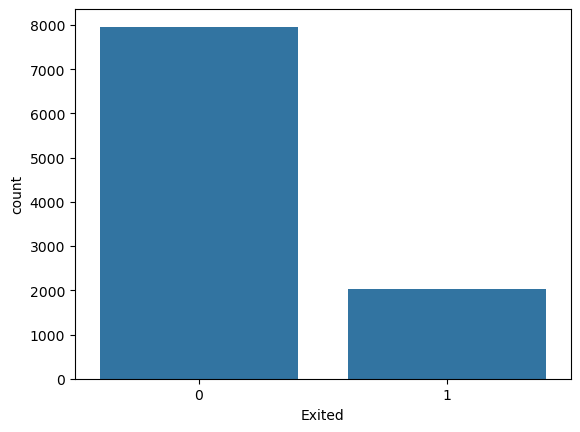

In [25]:
sns.countplot(x=y)

In [27]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [29]:
#normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
x_scaled=scaler.fit_transform(x)

In [33]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [35]:
# cross validation
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y)

In [39]:
x_scaled.shape

(10000, 8)

In [41]:
x_train.shape

(7500, 8)

In [43]:
x_test.shape

(2500, 8)

In [45]:
from sklearn.neural_network import MLPClassifier

In [53]:
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=100, max_iter=100, activation='relu', solver='adam', learning_rate='adaptive')

In [55]:
ann.fit(x_train,y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), learning_rate='adaptive',
              max_iter=100, random_state=100)

In [57]:
y_pred=ann.predict(x_test)

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score

In [61]:
y_test.value_counts()

Exited
0    1968
1     532
Name: count, dtype: int64

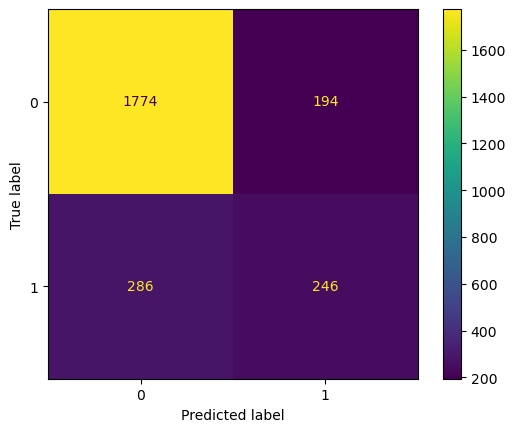

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [65]:
accuracy_score(y_test,y_pred)

0.808

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1968
           1       0.56      0.46      0.51       532

    accuracy                           0.81      2500
   macro avg       0.71      0.68      0.69      2500
weighted avg       0.80      0.81      0.80      2500

